## 0. 教程大纲

### 0.1 放大、缩小
```python
cv.resize(img, dsize, [interpolation])
```

### 0.2 平移变换
```python
M = np.array([[...]], dtype=np.float32)
cv.warpAffine(img, M, dsize)
```
### 0.3 错切变换

### 0.4 镜像变换
```python
cv.flip(img, 1) # 垂直镜像
cv.flip(img, 0) # 水平镜像
cv.flit(img, -1) # 水平垂直同时进行
```
### 0.5 旋转变换
```python
M = cv.getRotationMatrix2D(center, angle, scale)
img_rotate = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
```

### 0.6 透视变换
```python
M = cv.getPerspectiveTransform(src, dst)
img = cv.warpPerspective(img, M, dsize)
```

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 3 图像几何变换

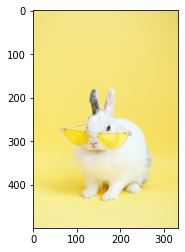

In [5]:
img = cv.imread('pic/rabbit500x333.jpg')
show(img)

In [6]:
img.shape

(500, 333, 3)

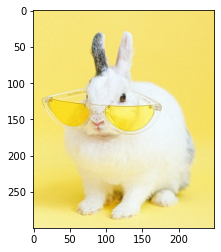

In [7]:
# 裁剪
rabbit = img[150:450, 50:300, :]
show(rabbit)

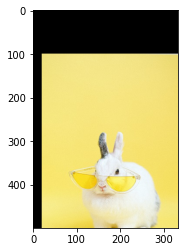

In [9]:
# 平移
transM = np.array([
    [1, 0, 20],
    [0, 1, 100]
], dtype=np.float32)

img_trans = cv.warpAffine(img, transM, dsize=(333, 500))
show(img_trans)

In [7]:
cv.imwrite("pic/img_rabbit_translate.jpg", np.hstack([img, img_trans]))

True

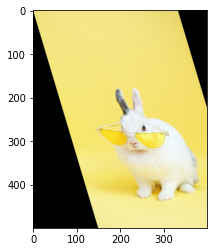

In [8]:
# 错切
shearM = np.array([
    [1, 0.3, 0],
    [0, 1,   0]
], dtype=np.float32)

img_shear = cv.warpAffine(img, shearM, dsize=(400, 500))

show(img_shear)

In [9]:
cv.imwrite("pic/img_rabbit_shear.jpg", np.hstack([img, img_shear]))

True

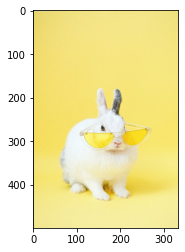

In [10]:
# 镜像1
mirrorM = np.array([
    [-1, 0, 333],
    [0,  1, 0]
], dtype=np.float32)

img_mirr = cv.warpAffine(img, mirrorM, dsize=img.shape[:2][::-1])
show(img_mirr)

In [11]:
cv.imwrite("pic/img_rabbit_mirror.jpg", np.hstack([img, img_mirr]))

True

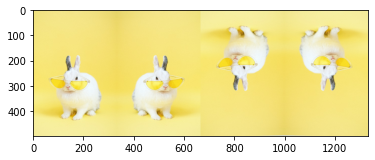

In [12]:
# 镜像2
img_mirh = cv.flip(img, 1)
img_mirv = cv.flip(img, 0)
img_mirb = cv.flip(img, -1)
show(np.hstack([img, img_mirh, img_mirv, img_mirb]))

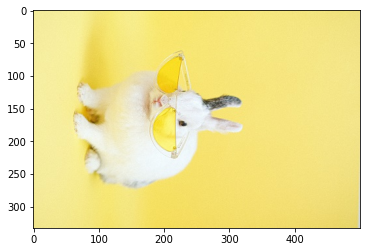

In [13]:
# 旋转1
img_rotate = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
show(img_rotate)

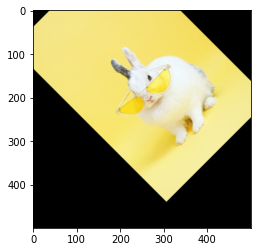

In [14]:
# 旋转2
rotateM = cv.getRotationMatrix2D((80, 100), 45, 1)
img_rotate = cv.warpAffine(img, rotateM, dsize=(500, 500))
show(img_rotate)

In [15]:
cv.imwrite("pic/img_rabbit_rotate.jpg", np.hstack([img, img_rotate]))

True

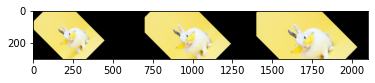

In [16]:
# 旋转scale
rotateM1 = cv.getRotationMatrix2D((80, 100), 45, 0.8)
rotateM2 = cv.getRotationMatrix2D((80, 100), 45, 1)
rotateM3 = cv.getRotationMatrix2D((80, 100), 45, 1.2)

img_rotate1 = cv.warpAffine(img, rotateM1, dsize=(700, 300))
img_rotate2 = cv.warpAffine(img, rotateM2, dsize=(700, 300))
img_rotate3 = cv.warpAffine(img, rotateM3, dsize=(700, 300))

show(np.hstack([img_rotate1, img_rotate2, img_rotate3]))

In [17]:
print(img.shape)

(500, 333, 3)


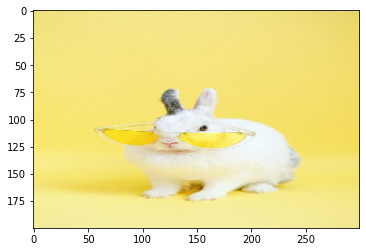

In [18]:
# 放大、缩小
img_resize = cv.resize(img, (300, 200))
show(img_resize)

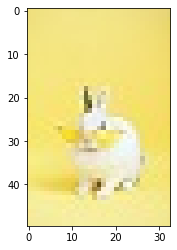

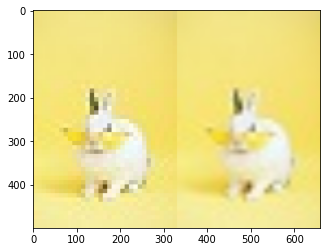

In [21]:
##### 最近邻和双线性插值比较
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def show(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
    plt.show()

img = cv.imread('pic/rabbit50x33.jpg')
img_resize1 = cv.resize(img, (330, 500), interpolation=cv.INTER_NEAREST)
img_resize2 = cv.resize(img, (330, 500), interpolation=cv.INTER_LINEAR)

show(img)
show(np.hstack([img_resize1, img_resize2]))

### *3.10 最近邻采样

In [24]:
mat = np.array([
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]
], dtype=np.uint8)

mat2 = cv.resize(mat, (4,4), interpolation = cv.INTER_LINEAR)
mat2

array([[1, 1, 2, 3],
       [3, 3, 4, 5],
       [5, 6, 6, 7],
       [7, 7, 8, 9]], dtype=uint8)

In [26]:
mat2 = cv.resize(mat, (4,4), interpolation = cv.INTER_NEAREST)
mat2

array([[1, 1, 2, 3],
       [1, 1, 2, 3],
       [4, 4, 5, 6],
       [7, 7, 8, 9]], dtype=uint8)

In [ ]:
9/4

In [ ]:
(2,3) / (4/3) = (6/4, 9/4)
(1, 2) (1, 3)

(2, 2) (2, 3)

3/4 * (1/2 * 1 + 1/2 * 4)  + 1/4 * (1/2*2 + 1/2*5)

In [4]:
3/4 * (1/2 * 2 + 1/2 * 5)  + 1/4 * (1/2*3 + 1/2*6)

3.75

In [ ]:
(3,3) / (4/3) = (9/4, 9/4)
(2, 2) (2, 3)

(3, 2) (3, 3)

In [3]:
3/4 * (3/4 * 5 + 1/4 * 6)  + 1/4 * (3/4 * 8 + 1/4 * 9)

6.0

In [5]:
import cv2 as cv

In [ ]:
cv.getPerspectiveTransform()

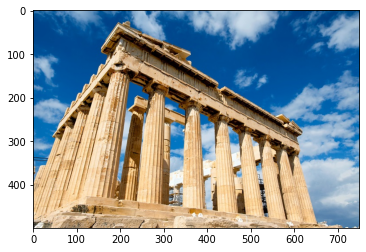

In [8]:
img = cv.imread('pic/parthenon500x750.jpg')
show(img)

In [18]:
src = np.array([
    [210, 50],
    [610, 270],
    [650, 480],
    [150, 450]
], dtype=np.float32)

dst = np.array([
    [150, 50],
    [650, 50],
    [650, 480],
    [150, 480]
], dtype=np.float32)

M = cv.getPerspectiveTransform(src, dst)

M

array([[ 2.71437487e-01,  1.50299394e-01,  5.07376979e+01],
       [-6.40928318e-01,  1.08051969e+00,  1.18987142e+02],
       [-1.23293942e-03,  5.45617563e-04,  1.00000000e+00]])

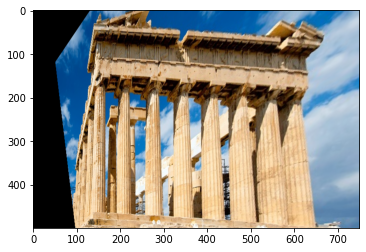

In [19]:
img2 = cv.warpPerspective(img, M, dsize=(750, 500))
show(img2)

In [20]:
import numpy as np

In [21]:
cv.imwrite('pic/parthenon_perspective.jpg', np.hstack([img, img2]))

True

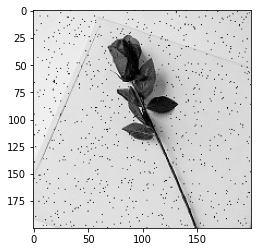

In [30]:
img2 = cv.imread('pic/rose_spnoise_200x200.jpg', 0)

show(img2)

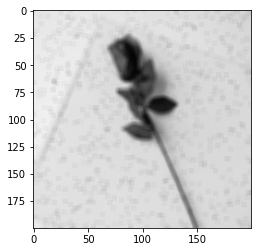

In [31]:
img3 = cv.GaussianBlur(img2, (5,5), 10)
show(img3)

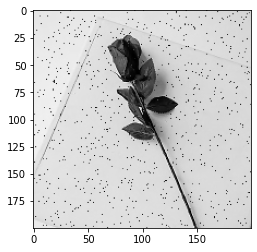

In [32]:
img4 = cv.bilateralFilter(img2, 3, 10, 10)
show(img4)